# 

# GRIP - The Sparks Foundation

# Data Science and Business Analytics Intern

# Author :VANKAYALAPATI AKHIL BABU

# Exploratory Data Analysis - Sports

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Loading data

In [2]:
matches=pd.read_csv('matches.csv')
deliveries=pd.read_csv('deliveries.csv')

# view data

In [3]:
matches.head(5)

,id,season,city,date,team1,team2,toss_winner,toss_decision,result,dl_applied,winner,win_by_runs,win_by_wickets,player_of_match,venue,umpire1,umpire2,umpire3
0,1,2017,Hyderabad,4/5/2017,Sunrisers Hyderabad,Royal Challengers Bangalore,Royal Challengers Bangalore,field,normal,0,Sunrisers Hyderabad,35,0,Yuvraj Singh,"Rajiv Gandhi International Stadium, Uppal",AY Dandekar,NJ Llong,NaN
1,2,2017,Pune,4/6/2017,Mumbai Indians,Rising Pune Supergiant,Rising Pune Supergiant,field,normal,0,Rising Pune Supergiant,0,7,SPD Smith,Maharashtra Cricket Association Stadium,A Nand Kishore,S Ravi,NaN
2,3,2017,Rajkot,4/7/2017,Gujarat Lions,Kolkata Knight Riders,Kolkata Knight Riders,field,normal,0,Kolkata Knight Riders,0,10,CA Lynn,Saurashtra Cricket Association Stadium,Nitin Menon,CK Nandan,NaN
3,4,2017,Indore,4/8/2017,Rising Pune Supergiant,Kings XI Punjab,Kings XI Punjab,field,normal,0,Kings XI Punjab,0,6,GJ Maxwell,Holkar Cricket Stadium,AK Chaudhary,C Shamshuddin,NaN
4,5,2017,Bangalore,4/8/2017,Royal Challengers Bangalore,Delhi Daredevils,Royal Challengers Bangalore,bat,normal,0,Royal Challengers Bangalore,15,0,KM Jadhav,M Chinnaswamy Stadium,NaN,NaN,NaN


In [4]:
deliveries.head(5)

,match_id,inning,batting_team,bowling_team,over,ball,batsman,non_striker,bowler,is_super_over,...,bye_runs,legbye_runs,noball_runs,penalty_runs,batsman_runs,extra_runs,total_runs,player_dismissed,dismissal_kind,fielder
0,1,1,Sunrisers Hyderabad,Royal Challengers Bangalore,1,1,DA Warner,S Dhawan,TS Mills,0,...,0,0,0,0,0,0,0,NaN,NaN,NaN
1,1,1,Sunrisers Hyderabad,Royal Challengers Bangalore,1,2,DA Warner,S Dhawan,TS Mills,0,...,0,0,0,0,0,0,0,NaN,NaN,NaN
2,1,1,Sunrisers Hyderabad,Royal Challengers Bangalore,1,3,DA Warner,S Dhawan,TS Mills,0,...,0,0,0,0,4,0,4,NaN,NaN,NaN
3,1,1,Sunrisers Hyderabad,Royal Challengers Bangalore,1,4,DA Warner,S Dhawan,TS Mills,0,...,0,0,0,0,0,0,0,NaN,NaN,NaN
4,1,1,Sunrisers Hyderabad,Royal Challengers Bangalore,1,5,DA Warner,S Dhawan,TS Mills,0,...,0,0,0,0,0,2,2,NaN,NaN,NaN


# Cleaning data(checking for missing values)

In [5]:
#we use isnull to check weather dataset is having missing values or not(if TRue there are missing values else no missing values)
deliveries.isnull().values.any()

#To check missing values for a specific row we use column name
deliveries['batsman'].isnull().values.any()

#To count in which columns there are missing values we us

deliveries.isnull().sum()



# # To count the missing values in the specific column
deliveries['non_striker'].isnull().sum()

#as there are no missing values we can continue to next step


0

In [6]:
# we perfom the same for matches
matches.isnull().values.any()

matches.isnull().sum()

# there are some missing values we need to find appropriate method to fill or delete them

id                   0
season               0
city                 7
date                 0
team1                0
team2                0
toss_winner          0
toss_decision        0
result               0
dl_applied           0
winner               3
win_by_runs          0
win_by_wickets       0
player_of_match      3
venue                0
umpire1              1
umpire2              1
umpire3            636
dtype: int64

In [7]:
#if we use pd.isnull we get only values with null in specified column
c=pd.isnull(matches['city'])
matches[c]

#Here the matches are held out of India so, they are so they are missing

,id,season,city,date,team1,team2,toss_winner,toss_decision,result,dl_applied,winner,win_by_runs,win_by_wickets,player_of_match,venue,umpire1,umpire2,umpire3
461,462,2014,NaN,4/19/2014,Mumbai Indians,Royal Challengers Bangalore,Royal Challengers Bangalore,field,normal,0,Royal Challengers Bangalore,0,7,PA Patel,Dubai International Cricket Stadium,Aleem Dar,AK Chaudhary,NaN
462,463,2014,NaN,4/19/2014,Kolkata Knight Riders,Delhi Daredevils,Kolkata Knight Riders,bat,normal,0,Delhi Daredevils,0,4,JP Duminy,Dubai International Cricket Stadium,Aleem Dar,VA Kulkarni,NaN
466,467,2014,NaN,4/23/2014,Chennai Super Kings,Rajasthan Royals,Rajasthan Royals,field,normal,0,Chennai Super Kings,7,0,RA Jadeja,Dubai International Cricket Stadium,HDPK Dharmasena,RK Illingworth,NaN
468,469,2014,NaN,4/25/2014,Sunrisers Hyderabad,Delhi Daredevils,Sunrisers Hyderabad,bat,normal,0,Sunrisers Hyderabad,4,0,AJ Finch,Dubai International Cricket Stadium,M Erasmus,S Ravi,NaN
469,470,2014,NaN,4/25/2014,Mumbai Indians,Chennai Super Kings,Mumbai Indians,bat,normal,0,Chennai Super Kings,0,7,MM Sharma,Dubai International Cricket Stadium,BF Bowden,M Erasmus,NaN
474,475,2014,NaN,4/28/2014,Royal Challengers Bangalore,Kings XI Punjab,Kings XI Punjab,field,normal,0,Kings XI Punjab,0,5,Sandeep Sharma,Dubai International Cricket Stadium,BF Bowden,S Ravi,NaN
476,477,2014,NaN,4/30/2014,Sunrisers Hyderabad,Mumbai Indians,Mumbai Indians,field,normal,0,Sunrisers Hyderabad,15,0,B Kumar,Dubai International Cricket Stadium,HDPK Dharmasena,M Erasmus,NaN


In [8]:
#For winnere and player_of_match     
m=pd.isnull(matches['winner'])
matches[m]

#https://www.espncricinfo.com/series/indian-premier-league-2011-466304/delhi-daredevils-vs-pune-warriors-68th-match-501265/full-scorecard
# we can see because of rain match had stopped so no rain

w=pd.isnull(matches['player_of_match'])
matches[w]

# we can conclude as there is no match result so no man of the match award

,id,season,city,date,team1,team2,toss_winner,toss_decision,result,dl_applied,winner,win_by_runs,win_by_wickets,player_of_match,venue,umpire1,umpire2,umpire3
300,301,2011,Delhi,5/21/2011,Delhi Daredevils,Pune Warriors,Delhi Daredevils,bat,no result,0,NaN,0,0,NaN,Feroz Shah Kotla,SS Hazare,RJ Tucker,NaN
545,546,2015,Bangalore,4/29/2015,Royal Challengers Bangalore,Rajasthan Royals,Rajasthan Royals,field,no result,0,NaN,0,0,NaN,M Chinnaswamy Stadium,JD Cloete,PG Pathak,NaN
570,571,2015,Bangalore,5/17/2015,Delhi Daredevils,Royal Challengers Bangalore,Royal Challengers Bangalore,field,no result,0,NaN,0,0,NaN,M Chinnaswamy Stadium,HDPK Dharmasena,K Srinivasan,NaN


# We can do our  analysis now(DELIVERIES)

# Batsman with more runs



In [9]:
#from deliveries we can find the batsmans runs

#Here we use the group by on batsman column,so we get all the bastman names and we sum the batsman_runs to get batsman with batsman runs

runs=deliveries.groupby(['batsman'])['batsman_runs'].sum()

# we use reset index and sorting so it shows batsman with runs in descending order.

runs=runs.reset_index().sort_values('batsman_runs',ascending=False,ignore_index=True)
 
#we use rename to change batsman_runs to runs using rename columsn
runs.rename(columns={'batsman_runs':'runs'},inplace=True)

#we use inplace to make change permeneant

runs

,batsman,runs
0,SK Raina,4548
1,V Kohli,4423
2,RG Sharma,4207
3,G Gambhir,4132
4,DA Warner,4014
...,...,...
456,Abdur Razzak,0
457,S Kaushik,0
458,S Ladda,0
459,U Kaul,0


# Top 10 Batsman


In [10]:
# Top 10 batsman with more runs are
runs.head(10)

,batsman,runs
0,SK Raina,4548
1,V Kohli,4423
2,RG Sharma,4207
3,G Gambhir,4132
4,DA Warner,4014
5,RV Uthappa,3778
6,CH Gayle,3651
7,S Dhawan,3561
8,MS Dhoni,3560
9,AB de Villiers,3486


# We can perfom indepth analysis of  SKRAINA

# RANIA DISMISSAL'S 

<AxesSubplot:ylabel='dismissal_kind'>

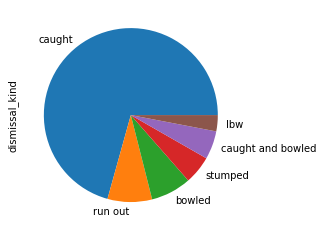

In [11]:
#we need only SKRAINA so we use conditonal statment

s=deliveries[deliveries['batsman']=='SK Raina']

# we can get shape by using shape
s.shape

#we can get dissmisal count of RAINA
s['dismissal_kind'].value_counts() #if we use value counts we get the unique value count for each column in group

#we can now draw a pie chart for the dismissals

s['dismissal_kind'].value_counts().plot.pie() #pie gives the pie chart 

# WE CAN CONCLUDE THE MORE DISMISSALS ARE BY CAUGHT FOLLOWED BY RUNOUT AND BOWLED

# RAINA RUNNING PERCENTAGE

([<matplotlib.patches.Wedge at 0x199a9d44d60>,
 [Text(-0.4184177728419113, 1.0173134066599214, '1'),
  Text(-0.23778610560795096, -1.0739915120613406, '4'),
  Text(0.7079993416843834, -0.8418651508255226, '2'),
  Text(1.0574262565103032, -0.3030671741423121, '6'),
  Text(1.0998393798348571, -0.018797302053141424, '3'),
  Text(1.0999988846476583, -0.00156645265105246, '5')],
 [Text(-0.22822787609558795, 0.5548982218145025, '62.4%'),
  Text(-0.12970151214979142, -0.5858135520334584, '18.2%'),
  Text(0.3861814591005727, -0.4591991731775577, '11.0%'),
  Text(0.576777958096529, -0.16530936771398838, '7.9%'),
  Text(0.5999123890008311, -0.010253073847168047, '0.5%'),
  Text(0.5999993916259954, -0.0008544287187558872, '0.0%')])

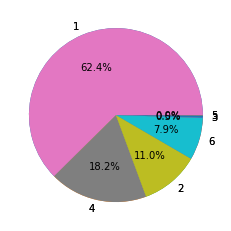

In [12]:
# we can drop zeroes and plot a pie

s=s[s['batsman_runs']!=0]


# we can use .valuescounts to get the total fours,sixes,runs 

s['batsman_runs'].value_counts()


# we get the number of 1s ,2s.... so we can plot them on a pie cahrt/
s['batsman_runs'].value_counts()

sli=[1377,402,242,174,10,1]
lb=[1,4,2,6,3,5]
plt.pie(sli,labels=lb)

#we can do convert it into percentage
plt.pie(sli,labels=lb,autopct='%1.1f%%')



# We can findout teams with more runs

In [13]:
z=deliveries.groupby(['batting_team'])['total_runs'].sum().reset_index().sort_values('total_runs',ascending=False,ignore_index=True)

#1)we group by batting team, so we get the all batting teams and do sum of total runs so we get total runs for team
#2)We use,reset index
#3)next we use sort values it values from the largest to smallest


#4)If we use ignore index then the index values get reseted

#example: 
        #before:
            #12,3,13,4,,9,10...........
        #After:
            #0,1,2,3,4,5,6.............

In [14]:
z.rename(columns={'total_runs':'runs'},inplace=True)
#we get our column name as total_runs so to change that we use rename columns 
#rename columns changes the original name of column to new name
#inplace True will make it true

In [15]:
z
#we can see MUMBAI has the highest number of runs

,batting_team,runs
0,Mumbai Indians,24521
1,Royal Challengers Bangalore,23436
2,Kings XI Punjab,23068
3,Kolkata Knight Riders,21965
4,Delhi Daredevils,21953
5,Chennai Super Kings,20899
6,Rajasthan Royals,17703
7,Sunrisers Hyderabad,11652
8,Deccan Chargers,11463
9,Pune Warriors,6358


# How many teams how many times scored more than 200

In [16]:
sc=deliveries.groupby(['match_id','batting_team'])['total_runs'].sum().reset_index()

#We use group by over match_id which gives the unqiue matchid and batting team
 
          #we get the per match what is the score of team 


In [106]:
ru=deliveries.groupby(['match_id','inning','batting_team'])['total_runs'].sum().reset_index()
ru.drop('match_id',axis=1,inplace=True)
ru


,match_id,inning,batting_team,total_runs
0,1,1,SRH,207
1,1,2,RCB,172
2,2,1,MI,184
3,2,2,RPS,187
4,3,1,GL,183
...,...,...,...,...
1279,634,2,KKR,140
1280,635,1,GL,162
1281,635,2,SRH,163
1282,636,1,SRH,208


In [107]:
#Here we take both innings1 and innings 2 seperately
i1=ru[ru['inning']==1] #it gives only Dataframe with innings 1

i2=ru[ru['inning']==2]#it gives only Dataframe with innings 2



<AxesSubplot:xlabel='batting_team', ylabel='total_runs'>

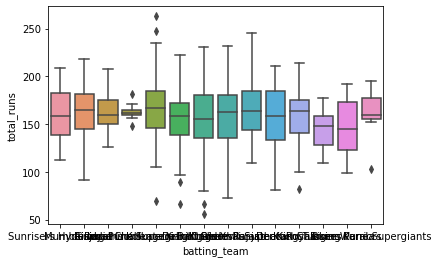

In [19]:
sns.boxplot(x='batting_team',y='total_runs',data=i1)

#we cannot see the names properly so we should rename them

In [108]:
#we take all the unique teams from batting team
# ru['batting_team'].unique()

#We rename them 

bt={ 'Sunrisers Hyderabad': 'SRH',
     'Royal Challengers Bangalore': 'RCB',
     'Mumbai Indians': 'MI',
     'Rising Pune Supergiant': 'RPS',
     'Gujarat Lions': 'GL',
     'Kolkata Knight Riders': 'KKR',
     'Kings XI Punjab': 'KXIP',
     'Delhi Daredevils': 'DD',
     'Chennai Super Kings': 'CSK',
     'Rajasthan Royals': 'RR',
     'Deccan Chargers': 'DC',
     'Kochi Tuskers Kerala': 'KTR',
     'Pune Warriors': 'PWI',
     'Rising Pune Supergiants': 'RPS'
      }
#we use map
#MAP:The map() function is used to map values of Series according to input correspondence.

#ex: the names of teams changes accourding to the name we specify
#     Sunrisers Hyderabad >>>  SRH
#     Royal Challengers Bangalore>>>>RCB
    
ru['batting_team']=ru['batting_team'].map(bt)
ru


,match_id,inning,batting_team,total_runs
0,1,1,SRH,207
1,1,2,RCB,172
2,2,1,MI,184
3,2,2,RPS,187
4,3,1,GL,183
...,...,...,...,...
1279,634,2,KKR,140
1280,635,1,GL,162
1281,635,2,SRH,163
1282,636,1,SRH,208


<AxesSubplot:xlabel='batting_team', ylabel='total_runs'>

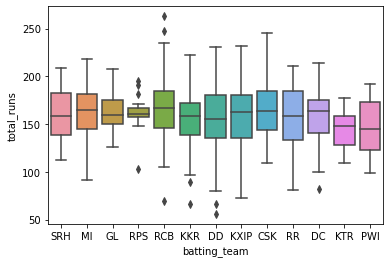

In [101]:
#Now we can use bloxplot
sns.boxplot(x='batting_team',y='total_runs',data=i1)

<AxesSubplot:xlabel='batting_team', ylabel='total_runs'>

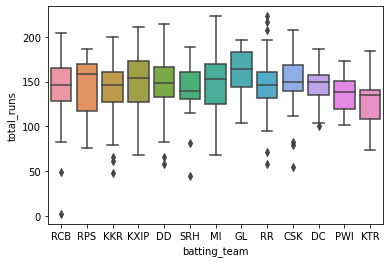

In [102]:
sns.boxplot(x='batting_team',y='total_runs',data=i2)

# No of times teams score above 200

<AxesSubplot:>

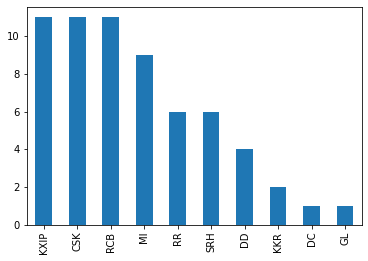

In [23]:
# For pass condition so we get only total_runs greater than 200
high_score=ru[ru['total_runs']>200]

# we use the value_counts to get the count of unique teams and we ploat bar on it

high_score['batting_team'].value_counts().plot.bar()

#RCB has scored more 200 than other teams 

# Batsman top score

In [24]:
#we use group by match_id,batsman and batting team and sort them from descending to ascending
bat=deliveries.groupby(['match_id','batsman','batting_team'])['batsman_runs'].sum().reset_index().sort_values('batsman_runs',ascending=False)
bat

,match_id,batsman,batting_team,batsman_runs
6200,411,CH Gayle,Royal Challengers Bangalore,175
900,60,BB McCullum,Kolkata Knight Riders,158
8426,562,AB de Villiers,Royal Challengers Bangalore,133
9257,620,AB de Villiers,Royal Challengers Bangalore,129
5585,372,CH Gayle,Royal Challengers Bangalore,128
...,...,...,...,...
5209,346,RE Levi,Mumbai Indians,0
5201,346,CL White,Deccan Chargers,0
7169,476,PP Chawla,Kolkata Knight Riders,0
540,37,AF Milne,Royal Challengers Bangalore,0


# # Batsman hit most fours

In [25]:
#first we metion condition so that we get only fours
four=deliveries[deliveries['batsman_runs']==4]

#next we use group by over batsman and count the no of fours
p=four.groupby(['batsman'])['batsman_runs'].count().reset_index().sort_values('batsman_runs',ascending=False,ignore_index=True)

#we use rename e to change the column name from batsman_runs to no_of_fours

p.rename(columns={'batsman_runs':'no_of_fours'},inplace=True)

#we use head to see player with more fours

p.head(1)

#WE see Gambhir had more fours

,batsman,no_of_fours
0,G Gambhir,484


# Batsman hit most sixes

In [26]:
#first we metion condition so that we get only fours
sixes=deliveries[deliveries['batsman_runs']==6]

#next we use group by over batsman and count the no of fours
si=sixes.groupby(['batsman'])['batsman_runs'].count().reset_index().sort_values('batsman_runs',ascending=False,ignore_index=True)

#we use rename e to change the column name from batsman_runs to no_of_fours

si.rename(columns={'batsman_runs':'no_of_sixes'},inplace=True)

#we use head to see player with more fours

si.head(1)

#of course its GAYLE

,batsman,no_of_sixes
0,CH Gayle,266


# Bowler with more number of wickets


<AxesSubplot:xlabel='bowler'>

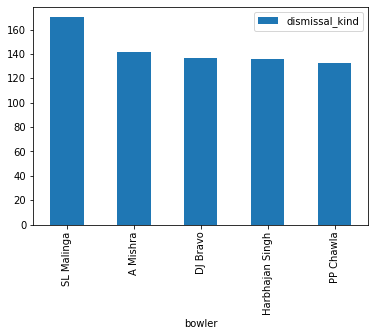

In [27]:
#we use group by to get the bower with count of their wickets
o=deliveries.groupby(['bowler'])['dismissal_kind'].count().reset_index().sort_values('dismissal_kind',ascending=False,ignore_index=True)
p=o.head(5)
# p.plot(kind='bar')
p.plot.bar(x='bowler',y='dismissal_kind')

#malinga had ore no of wickets


# Bowling strike rate

In [28]:
#Bowling strike rate is calculated as total balls bowled / wickets taken by bowler.

balls=deliveries.groupby(['bowler'])['ball'].count().reset_index() #we count no of balls bowled by bolwer
balls['overs']=balls['ball']/6  #if we divide by 6 we get overs

balls['overs']=balls['overs'].astype(int) #.astype converts from float to int

wickets=deliveries.groupby(['bowler'])['dismissal_kind'].count().reset_index() #we use group by to get wickets

tot=pd.merge(balls,wickets,on='bowler',how='right')#we merge two dataframes taht is balls and wickets so we get bastaman with wicktes and balls

tot.rename(columns={'dismissal_kind':'No_of_wickets'},inplace=True) #we change name of column

In [29]:
tot['economy']=tot['ball']/tot['No_of_wickets'] # we use formula to get strike rate

tot

,bowler,ball,overs,No_of_wickets,economy
0,A Ashish Reddy,270,45,19,14.210526
1,A Chandila,234,39,11,21.272727
2,A Choudhary,108,18,5,21.600000
3,A Flintoff,66,11,2,33.000000
4,A Kumble,983,163,49,20.061224
...,...,...,...,...,...
351,YA Abdulla,222,37,15,14.800000
352,YK Pathan,1166,194,45,25.911111
353,YS Chahal,1219,203,72,16.930556
354,Yuvraj Singh,869,144,39,22.282051


# PERFOM ANALYSIS ON MATCHES

# Total matches played

In [30]:
#we use .count to get the count of id 

matches['id'].count()#here we use ids beacuse it is the unique value for each match

636

# Total venues

In [31]:
ven=matches['venue'].value_counts().reset_index().sort_values('venue',ascending=False)
ven.rename(columns={'index':'venue','venue':'noofmatchespalyed'})


,venue,noofmatchespalyed
0,M Chinnaswamy Stadium,66
1,Eden Gardens,61
2,Feroz Shah Kotla,60
3,Wankhede Stadium,57
4,"Rajiv Gandhi International Stadium, Uppal",49
5,"MA Chidambaram Stadium, Chepauk",48
6,"Punjab Cricket Association Stadium, Mohali",35
7,Sawai Mansingh Stadium,33
9,Subrata Roy Sahara Stadium,17
8,Dr DY Patil Sports Academy,17


# Total team's

In [32]:
z=matches['team1'] #we assign team1 to z
p=matches['team2']  
team=pd.concat([z,p])#we concat the two dataframes so we all the teams into single column

len(team.unique())#here we use len because it gives the length
    #we use team.unique so we get the unique team names and len gives length of it


14

# Most Man of the match awards

<AxesSubplot:>

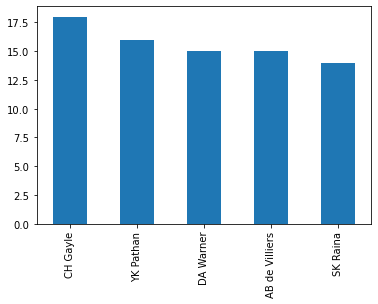

In [33]:
matches['player_of_match'].value_counts().head(5).plot.bar() #we se the value counts which gives the batsman with noof awards and we plot bar on taht

#we can see Gayle had played most no fo matches



# Toss decision across seasosns

<AxesSubplot:xlabel='season,toss_decision'>

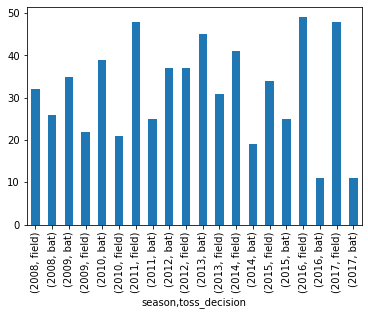

In [34]:
matches.groupby(['season'])['toss_decision'].value_counts().plot.bar()

#THe majority of toss winners opt for bowling

# Maximum toss winners

<AxesSubplot:>

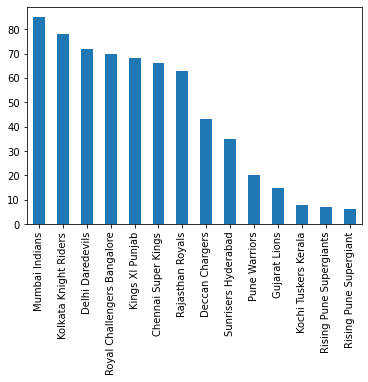

In [35]:
matches['toss_winner'].value_counts().plot.bar()

#mMUMBAI INDIANS WON MORE TOSS

# NO OF MATCHES WIN BY EACH TEAM

In [36]:
m=(matches['team1'].value_counts()+matches['team2'].value_counts()).reset_index() #here we add the two teams into single column

m.rename(columns={'index':'teams',0:'played'},inplace=True)#we reanme the column 

wins=matches['winner'].value_counts().reset_index() #we the teams along with their wins

wins.rename(columns={'index':'teams'},inplace=True) #again we rename the column

wins

,teams,winner
0,Mumbai Indians,92
1,Chennai Super Kings,79
2,Kolkata Knight Riders,77
3,Royal Challengers Bangalore,73
4,Kings XI Punjab,70
5,Rajasthan Royals,63
6,Delhi Daredevils,62
7,Sunrisers Hyderabad,42
8,Deccan Chargers,29
9,Gujarat Lions,13


In [37]:
tot=pd.merge(m,wins,on='teams',how='inner')#here we merge both of the data frames using inner join so we get all the common elemnts

tot.sort_values('winner',ascending=False,ignore_index=True,inplace=True) #here we sort them desc and ignoreIndex gives the index from o to end rather than excat index values

tot
#we can say mumbi had won more no of matches

,teams,played,winner
0,Mumbai Indians,157,92
1,Chennai Super Kings,131,79
2,Kolkata Knight Riders,148,77
3,Royal Challengers Bangalore,152,73
4,Kings XI Punjab,148,70
5,Rajasthan Royals,118,63
6,Delhi Daredevils,147,62
7,Sunrisers Hyderabad,76,42
8,Deccan Chargers,75,29
9,Gujarat Lions,30,13


# Matches played in each season

<AxesSubplot:xlabel='season', ylabel='matches played'>

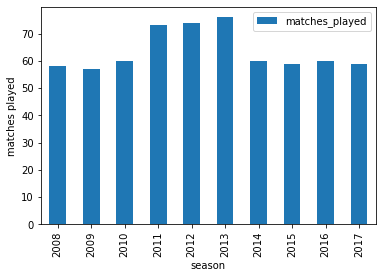

In [38]:
z=matches.groupby(['season'])['id'].count().reset_index()
z.rename(columns={'id':'matches_played'},inplace=True)
z.plot.bar(x='season',y='matches_played',ylabel='matches played')

#we can say that more matches were played between 2011-2013

# COMPARATIVE ANALYSIS

In [39]:
#1) we need to merge both of them so we can pefom the anlayis

s=matches[['id','season']].merge(deliveries,left_on='id',right_on='match_id',how='left')

#We can see there are two colums with same values so we have to drop1 so we drop match_id

s.drop('match_id',axis=1,inplace=True) #we use drop function to drop the particular column 

    #axis specifies in which it was like it was from 0 or 1
s

,id,season,inning,batting_team,bowling_team,over,ball,batsman,non_striker,bowler,...,bye_runs,legbye_runs,noball_runs,penalty_runs,batsman_runs,extra_runs,total_runs,player_dismissed,dismissal_kind,fielder
0,1,2017,1,Sunrisers Hyderabad,Royal Challengers Bangalore,1,1,DA Warner,S Dhawan,TS Mills,...,0,0,0,0,0,0,0,NaN,NaN,NaN
1,1,2017,1,Sunrisers Hyderabad,Royal Challengers Bangalore,1,2,DA Warner,S Dhawan,TS Mills,...,0,0,0,0,0,0,0,NaN,NaN,NaN
2,1,2017,1,Sunrisers Hyderabad,Royal Challengers Bangalore,1,3,DA Warner,S Dhawan,TS Mills,...,0,0,0,0,4,0,4,NaN,NaN,NaN
3,1,2017,1,Sunrisers Hyderabad,Royal Challengers Bangalore,1,4,DA Warner,S Dhawan,TS Mills,...,0,0,0,0,0,0,0,NaN,NaN,NaN
4,1,2017,1,Sunrisers Hyderabad,Royal Challengers Bangalore,1,5,DA Warner,S Dhawan,TS Mills,...,0,0,0,0,0,2,2,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
150455,636,2016,2,Royal Challengers Bangalore,Sunrisers Hyderabad,20,2,Sachin Baby,CJ Jordan,B Kumar,...,0,0,0,0,2,0,2,NaN,NaN,NaN
150456,636,2016,2,Royal Challengers Bangalore,Sunrisers Hyderabad,20,3,Sachin Baby,CJ Jordan,B Kumar,...,0,0,0,0,0,0,0,CJ Jordan,run out,NV Ojha
150457,636,2016,2,Royal Challengers Bangalore,Sunrisers Hyderabad,20,4,Iqbal Abdulla,Sachin Baby,B Kumar,...,0,1,0,0,0,1,1,NaN,NaN,NaN
150458,636,2016,2,Royal Challengers Bangalore,Sunrisers Hyderabad,20,5,Sachin Baby,Iqbal Abdulla,B Kumar,...,0,0,0,0,1,0,1,NaN,NaN,NaN


# Total runs per season

In [40]:
#We use groupby too find runs per season

z=s.groupby(['season'])['total_runs'].sum().reset_index()
z


,season,total_runs
0,2008,17937
1,2009,16353
2,2010,18883
3,2011,21154
4,2012,22453
5,2013,22602
6,2014,18931
7,2015,18353
8,2016,18862
9,2017,18786


<AxesSubplot:xlabel='season'>

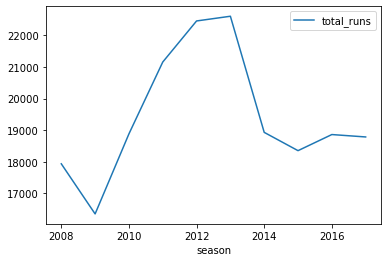

In [41]:
z.plot(x='season',y='total_runs')

#WE CAN CCONCLUDE TAHT MORE NUMBER OF MATCHES PLAYED RESULTS IN MORE RUNS